# TUMOR - CNR - Statistics information about ROIs


Created: 2021.11.24 / Updated: 2021.11.28

In [8]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
%matplotlib inline

import os
import pathlib
import glob

import numpy as np
import pandas as pd
import nibabel as nib
import matplotlib.pyplot as plt

In [10]:
import utils
import functions1 as f1

# GLOBAL VARIABLES

In [11]:
HOME_DIR = pathlib.Path(os.getcwd()).parent
DATA_DIR = HOME_DIR / 'data'
RESULTS_DIR = DATA_DIR / 'results'

SUB = 'CC1'

---

# OUR FUNCTIONS

In [12]:
def info(vox_inside_sth, name='Some roi'):
    print(80*'*')
    print(f' *** {name} ***')
    print(vox_inside_sth.shape)
    print(f'mean: {vox_inside_sth.mean():.3f}')
    print(f'max: {vox_inside_sth.max()}')
    print(f'min: {vox_inside_sth.min()}')
    print(f'std: {vox_inside_sth.std():.4f}')

In [ ]:
def load_images_for_subject(sub_name, folder=RESULTS_DIR):
    """
    Loades images for a subject:
    
    Parameters:
    -------------------------------
    sub_name - subject prefix, e.g., 'CC1'
    folder - path to the folter with images, by default it is RESULTS_DIR (./data/results).
    
    Returns:
    -------------------------------
    img - loaded image,
    roi - loaded roi image,
    bla - loaded bladder image
    
    C: 2021.11.28 / U: 2021.11.28
    """
    img = nib.load(RESULTS_DIR / f'{sub_name}_t2.nii.gz')
    roi = nib.load(RESULTS_DIR / f'{sub_name}_t2_roi.nii.gz')
    bla = nib.load(RESULTS_DIR / f'{sub_name}_t2_bladder.nii.gz')

---

# GET LIST ALL CC1 IMAGES

In [5]:
files = list(RESULTS_DIR.glob(f"*{SUB}*.nii.gz"))
files

[PosixPath('/home/marek/Dropbox/p1ext4_P/no_work/TUMOR-CNR/tumor-cnr-git/data/results/CC1_t2_roi.nii.gz'),
 PosixPath('/home/marek/Dropbox/p1ext4_P/no_work/TUMOR-CNR/tumor-cnr-git/data/results/CC1_t2_roi_dilated_ball2.nii.gz'),
 PosixPath('/home/marek/Dropbox/p1ext4_P/no_work/TUMOR-CNR/tumor-cnr-git/data/results/CC1_t2_roi_dilated2.nii.gz'),
 PosixPath('/home/marek/Dropbox/p1ext4_P/no_work/TUMOR-CNR/tumor-cnr-git/data/results/CC1_t2_roi_dilated_ball3.nii.gz'),
 PosixPath('/home/marek/Dropbox/p1ext4_P/no_work/TUMOR-CNR/tumor-cnr-git/data/results/CC1_t2_roi_dilated_ball5.nii.gz'),
 PosixPath('/home/marek/Dropbox/p1ext4_P/no_work/TUMOR-CNR/tumor-cnr-git/data/results/CC1_t2_roi_dilated1.nii.gz'),
 PosixPath('/home/marek/Dropbox/p1ext4_P/no_work/TUMOR-CNR/tumor-cnr-git/data/results/CC1_t2_bladder.nii.gz'),
 PosixPath('/home/marek/Dropbox/p1ext4_P/no_work/TUMOR-CNR/tumor-cnr-git/data/results/CC1_t2.nii.gz'),
 PosixPath('/home/marek/Dropbox/p1ext4_P/no_work/TUMOR-CNR/tumor-cnr-git/data/result

In [6]:
# print only names
_ = [print(f'{k+1}) {f.name}') for k, f in enumerate(sorted(files))]

1) CC1_t2.nii.gz
2) CC1_t2_bladder.nii.gz
3) CC1_t2_roi.nii.gz
4) CC1_t2_roi_cm.nii.gz
5) CC1_t2_roi_dilated1.nii.gz
6) CC1_t2_roi_dilated2.nii.gz
7) CC1_t2_roi_dilated_ball2.nii.gz
8) CC1_t2_roi_dilated_ball3.nii.gz
9) CC1_t2_roi_dilated_ball5.nii.gz


## LOAD ALL IMAGES

In [8]:
# nii structure
nii = nib.load(RESULTS_DIR / 'CC1_t2.nii.gz')
# image
img = nii.get_fdata()
# roi
roi = nib.load(RESULTS_DIR / 'CC1_t2_roi.nii.gz').get_fdata()
# dilated 1
dil1 = nib.load(RESULTS_DIR / 'CC1_t2_roi_dilated1.nii.gz').get_fdata()
# dilated 2
dil2 = nib.load(RESULTS_DIR / 'CC1_t2_roi_dilated2.nii.gz').get_fdata()
# ball2
bal2 = nib.load(RESULTS_DIR / 'CC1_t2_roi_dilated_ball2.nii.gz').get_fdata()
# ball3
bal3 = nib.load(RESULTS_DIR / 'CC1_t2_roi_dilated_ball3.nii.gz').get_fdata()
# ball5
bal5 = nib.load(RESULTS_DIR / 'CC1_t2_roi_dilated_ball5.nii.gz').get_fdata()
# bladder
blad = nib.load(RESULTS_DIR / 'CC1_t2_bladder.nii.gz').get_fdata()

In [9]:
rim = bal5 - roi

In [10]:
f1.im_info(img, 'Image')
f1.im_info(roi, 'ROI')
f1.im_info(bal5, 'Ball5')
f1.im_info(blad, 'Bladder')
f1.im_info(rim, 'rim')

*** IMAGE ***,	max=988.0, min=0.0, aver=252.81, shape=(320, 320, 25), dtype=float64
*** ROI ***,	max=1.0, min=0.0, aver=0.00, shape=(320, 320, 25), dtype=float64
*** BALL5 ***,	max=1.0, min=0.0, aver=0.02, shape=(320, 320, 25), dtype=float64
*** BLADDER ***,	max=1.0, min=0.0, aver=0.00, shape=(320, 320, 25), dtype=float64
*** RIM ***,	max=1.0, min=0.0, aver=0.01, shape=(320, 320, 25), dtype=float64


In [11]:
vox_inside_roi = np.where(roi,img,0)

In [12]:
vox_inside_roi.shape

(320, 320, 25)

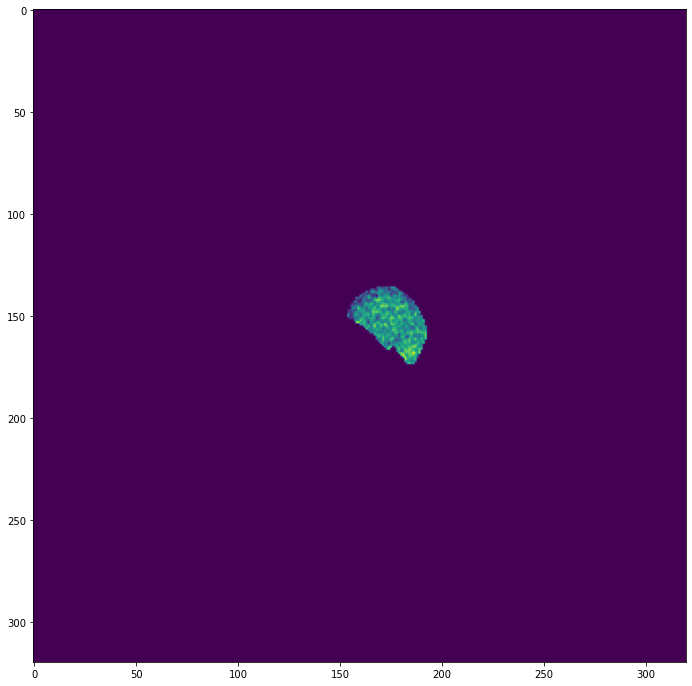

In [13]:
plt.figure(figsize=(18,12))
plt.imshow(vox_inside_roi[:,:,12])
plt.show()

In [14]:
vox_inside_roi2 = img[roi==1]
print(vox_inside_roi2.shape)
print(f'mean: {vox_inside_roi2.mean():.3f}')
print(f'max: {vox_inside_roi2.max()}')
print(f'min: {vox_inside_roi2.min()}')

(9180,)
mean: 168.945
max: 507.0
min: 0.0


In [15]:
vox_inside_bal5 = img[bal5==1]
print(vox_inside_bal5.shape)
print(f'mean: {vox_inside_bal5.mean():.3f}')
print(f'max: {vox_inside_bal5.max()}')
print(f'min: {vox_inside_bal5.min()}')

(38796,)
mean: 256.686
max: 801.0
min: 0.0


In [21]:
vox_inside_rim = img[rim==1]
vox_inside_bladder = img[blad==1]

In [22]:
info(vox_inside_roi2, 'ROI')
info(vox_inside_bal5, 'bal5')
info(vox_inside_rim, 'rim')

info(vox_inside_bladder, 'bladder')

********************************************************************************
 *** ROI ***
(9180,)
mean: 168.945
max: 507.0
min: 0.0
std: 79.0200
********************************************************************************
 *** bal5 ***
(38796,)
mean: 256.686
max: 801.0
min: 0.0
std: 149.1830
********************************************************************************
 *** rim ***
(29616,)
mean: 283.883
max: 801.0
min: 0.0
std: 155.2180
********************************************************************************
 *** bladder ***
(1572,)
mean: 378.782
max: 462.0
min: 294.0
std: 26.6800


In [23]:
CNR_std = (vox_inside_roi2.mean() - vox_inside_rim.mean()) / vox_inside_bladder.std()
print(f'CNR={CNR_std:.3f}')

CNR=-4.308


In [24]:
CNR_mean = (vox_inside_roi2.mean() - vox_inside_rim.mean()) / vox_inside_bladder.mean()
print(f'CNR={CNR_mean:.3f}')

CNR=-0.303


----

# CNR for all subjects

## CC1

In [60]:
def CNRs(sub1):
    """
    C: 2021..11.26 / U: 2021.11.26
    """
    # nii structure
    nii = nib.load(RESULTS_DIR / f'{sub1}_t2.nii.gz')
    # image
    img = nii.get_fdata()
    # roi
    roi = nib.load(RESULTS_DIR / f'{sub1}_t2_roi.nii.gz').get_fdata()
    # dilated 2
    dil2 = nib.load(RESULTS_DIR / f'{sub1}_t2_roi_dilated2.nii.gz').get_fdata()
    # ball3
    bal3 = nib.load(RESULTS_DIR / f'{sub1}_t2_roi_dilated_ball3.nii.gz').get_fdata()
    # bladder
    blad = nib.load(RESULTS_DIR / f'{sub1}_t2_bladder.nii.gz').get_fdata()

    rim = bal3 - roi

    vox_inside_roi = np.where(roi,img,0)

    vox_inside_rim = img[rim==1]
    vox_inside_bladder = img[blad==1]

    print(f' *** {sub1} ***')
    
    
    cc = [vox_inside_roi.mean(), vox_inside_rim.mean(),vox_inside_bladder.mean()]
    df = {sub1:cc}
    tab = pd.DataFrame.from_dict(df)
    
    print(f'\troi mean: {vox_inside_roi.mean():.2f}, std: {vox_inside_roi.std():.3f}')
    print(f'\trim mean: {vox_inside_rim.mean():.2f}, std: {vox_inside_rim.std():.3f}')
    print(f'\tbla mean: {vox_inside_bladder.mean():.2f}, std:{vox_inside_bladder.std():.3f}')
    
    print()
    CNR_std = (vox_inside_roi2.mean() - vox_inside_rim.mean()) / vox_inside_bladder.std()
    print(f'\tCNR_std = {CNR_std:.3f}')

    CNR_mean = (vox_inside_roi2.mean() - vox_inside_rim.mean()) / vox_inside_bladder.mean()
    print(f'\tCNR_mean = {CNR_mean:.3f}')
    
    print(80*'*')
    return tab

In [64]:
t = CNRs('CC1')
t

 *** CC1 ***
	roi mean: 0.61, std: 11.152
	rim mean: 299.73, std: 170.820
	bla mean: 378.78, std:26.680

	CNR_std = -4.902
	CNR_mean = -0.345
********************************************************************************


,CC1
0,0.605825
1,299.732633
2,378.782443


In [65]:
t = CNRs('CC2')
t

 *** CC2 ***
	roi mean: 0.12, std: 7.086
	rim mean: 279.99, std: 165.265
	bla mean: 628.98, std:16.266

	CNR_std = -6.827
	CNR_mean = -0.177
********************************************************************************


,CC2
0,0.119497
1,279.990357
2,628.976744


In [66]:
t = CNRs('CC3')
t

 *** CC3 ***
	roi mean: 2.41, std: 26.182
	rim mean: 554.36, std: 295.212
	bla mean: 609.81, std:19.216

	CNR_std = -20.057
	CNR_mean = -0.632
********************************************************************************


,CC3
0,2.409440
1,554.359872
2,609.813333


In [86]:
utils.print_date(5)

23-Nov-2021 13:45:32


In [87]:
utils.save_notebook_as_html(file_name='cnr-05-cc1-cnr', cleaning_delay=2)